In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
# connected=True means it will download the latest version of plotly javascript library.
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf

In [2]:
app = pd.read_csv('googleplaystore.csv')
user = pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
app.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2679,Bukalapak - Buy and Sell Online,SHOPPING,4.4,662287,21M,"10,000,000+",Free,0,Everyone,Shopping,"August 3, 2018",4.26.7,4.1 and up
6057,Be My Love Animated Keyboard,PERSONALIZATION,4.6,838,11M,"50,000+",Free,0,Teen,Personalization,"March 30, 2018",1.70,4.1 and up
2464,VetCode,MEDICAL,4.9,28,5.7M,"5,000+",Free,0,Everyone,Medical,"July 7, 2018",1.0,4.4 and up
10554,PRO MX MOTOCROSS 2,GAME,3.8,25275,21M,"5,000,000+",Free,0,Everyone,Racing,"August 11, 2017",1.10,2.3 and up
7893,Abdominal CT Sectional Walker,MEDICAL,NaN,2,23M,100+,Paid,$9.99,Everyone,Medical,"July 8, 2016",1.1,4.0 and up
4404,Fantastic Chefs: Match 'n Cook,FAMILY,4.7,8600,91M,"500,000+",Free,0,Everyone,Puzzle,"July 27, 2018",1.0.7,4.0.3 and up
10744,FP Markets,FINANCE,NaN,1,2.0M,100+,Free,0,Everyone,Finance,"January 30, 2018",1.0.0.0,4.3 and up
2044,Garden Fruit Legend,FAMILY,4.6,4289,33M,"500,000+",Free,0,Everyone,Casual;Brain Games,"July 31, 2018",3.5.3183,4.0.3 and up
7497,CL Mobile Pro - Classifieds for Craigslist,SHOPPING,4.1,1288,18M,"100,000+",Free,0,Mature 17+,Shopping,"July 9, 2018",48,4.1 and up
8147,Hlášenírozhlasu.cz,COMMUNICATION,NaN,0,17M,10+,Free,0,Everyone,Communication,"July 27, 2018",2.1.3,4.1 and up


In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Apps that have null values
app.shape[0] - app.count()[app.count() < app.shape[0]]

Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# Dropna and dublicates
app.drop_duplicates('App', inplace=True)
app['Rating'].fillna(0, inplace=True)
app.dropna(axis=0, inplace=True)

app.shape[0] - app.count()[app.count() < app.shape[0]]

Series([], dtype: int64)

## Cleaning Data

* remove unit in size and make it number.
* remove '+' in Installs
* readable date format in Last Updated.
* make version readable.
* make android version readable.

In [7]:
app['Size'][app['Size'] != 'Varies with device'] = app['Size'][app['Size'] != 'Varies with device'].apply(
    lambda x: float(x[:-1]) if x[-1] == 'M' else float(x[:-1])/1000 if x[-1] == 'k' else x
)

In [8]:
app['Installs'] = app['Installs'].apply(
    lambda x: float(x[:-1].replace(',', '')) if x[-1] == '+' else x
)

In [9]:
app['Android Ver'][app['Android Ver'] != 'Varies with device'] = app['Android Ver'][app['Android Ver'] != 'Varies with device'].apply(
    lambda x: float(str(x)[0:3])
)

In [10]:
app['Price'] = app['Price'].apply(
    lambda x: float(x.replace('$', ''))
)

In [11]:
app['Reviews'] = app['Reviews'].apply(
    lambda x: float(x.replace('$', ''))
)

In [12]:
app.shape

(9648, 13)

In [13]:
app.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.064678,0.070539,-0.014394
Reviews,0.064678,1.000000,0.625158,-0.007604
Installs,0.070539,0.625158,1.000000,-0.009413
Price,-0.014394,-0.007604,-0.009413,1.000000


In [14]:
app.describe()

,Rating,Reviews,Installs,Price
count,9648.000000,9.648000e+03,9.648000e+03,9648.000000
mean,3.542651,2.168369e+05,7.786211e+06,1.100193
std,1.574478,1.832349e+06,5.378830e+07,16.861727
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.600000,2.500000e+01,1.000000e+03,0.000000
50%,4.200000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


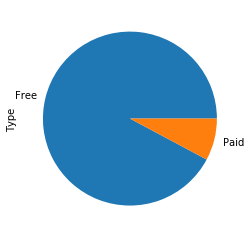

In [29]:
app['Type'].value_counts().plot('pie')

In [16]:
app['Installs'].value_counts()

1.000000e+06    1416
1.000000e+05    1112
1.000000e+04    1029
1.000000e+07     937
1.000000e+03     886
1.000000e+02     709
5.000000e+06     607
5.000000e+05     504
5.000000e+04     468
5.000000e+03     467
1.000000e+01     384
5.000000e+02     328
5.000000e+01     204
5.000000e+07     202
1.000000e+08     188
5.000000e+00      82
1.000000e+00      67
5.000000e+08      24
1.000000e+09      20
0.000000e+00      14
Name: Installs, dtype: int64

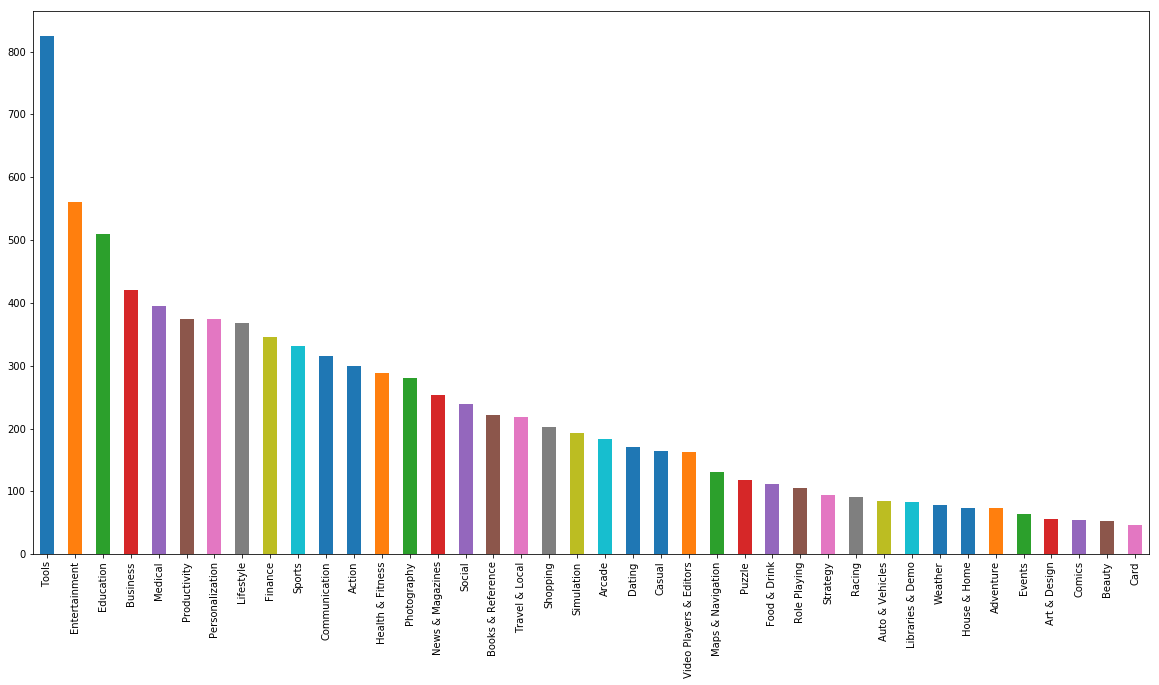

In [17]:
app['Genres'].value_counts()[:40].plot('bar', figsize=(20,10))

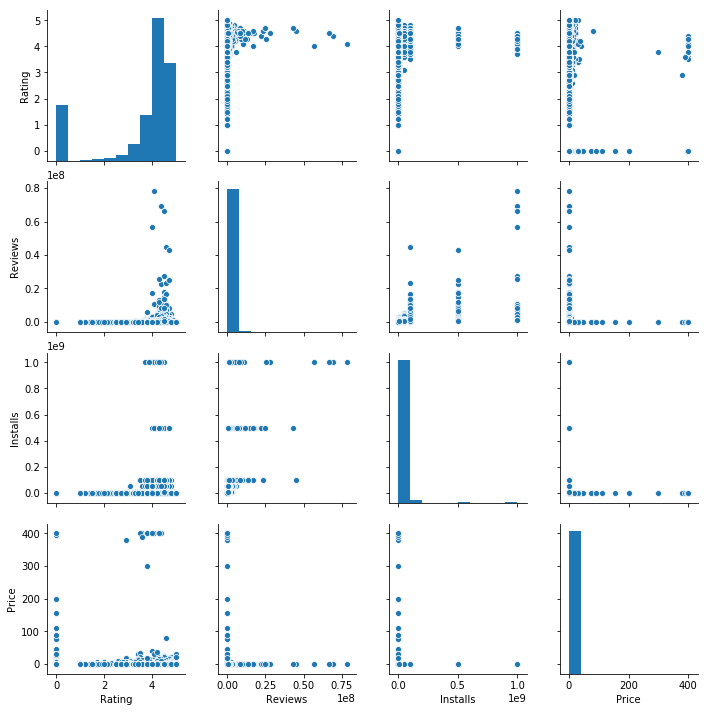

In [18]:
sns.pairplot(app)

In [19]:
apptype = app['Android Ver'].value_counts()

plotly.offline.iplot([
    go.Bar(
        y = apptype.index,
        x = apptype.values,
        orientation = 'h'
    )
], filename='basic_pie_chart')

In [20]:
# plotly.offline.iplot([
#     go.Scatter(
#         x = app['Rating'],
#         y = app['Reviews'],
#         mode = 'markers',
#         marker = dict(
#             size = app['Price']*0.05 + 10
#         )
#     )
# ])

In [21]:
user.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
11662,Baby Tiger Care - My Cute Virtual Pet Friend,NaN,NaN,NaN,NaN
61768,High-Powered Flashlight,I love,Positive,0.500000,0.600000
32035,DEER HUNTER 2018,NaN,NaN,NaN,NaN
60564,Health and Nutrition Guide,Wonderful works great,Positive,0.900000,0.875000
13822,BeautyPlus - Easy Photo Editor & Selfie Camera,NaN,NaN,NaN,NaN
24011,"Canva: Poster, banner, card maker & graphic de...","Exactly I looking create beautiful flyers, pos...",Positive,0.472222,0.622222
61994,Hill Climb Racing,NaN,NaN,NaN,NaN
12369,Banjo,Mixed feelings I mixed feelings app. On hand w...,Positive,0.216667,0.531481
60491,Headspace: Meditation & Mindfulness,NaN,NaN,NaN,NaN
17662,Brightest Flashlight - LED Light,NaN,NaN,NaN,NaN


In [22]:
user.count()

App                       64295
Translated_Review         37427
Sentiment                 37432
Sentiment_Polarity        37432
Sentiment_Subjectivity    37432
dtype: int64

In [23]:
# remove all the empty onse
user.dropna(inplace=True)

In [24]:
app_review = user.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean'
})

In [25]:
app_review.sample(5)

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
Cougar Dating Life : Date Older Women Sugar Mummy,0.324570,0.588513
Buienradar - weer,0.086789,0.488779
Firefox Browser fast & private,0.110142,0.518786
A+ Mobile,0.329592,0.522708
BetterMe: Weight Loss Workouts,0.292275,0.498256


In [26]:
app_full = app.join(app_review, on='App')

In [27]:
app_full.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
3282,Alarm Clock Free,TOOLS,4.0,59973.0,11,10000000.0,Free,0.00,Everyone,Tools,"March 16, 2018",1.2.5,4,0.155762,0.35684
4159,Wrestling Revolution 3D,SPORTS,4.3,989344.0,51,50000000.0,Free,0.00,Teen,Sports,"July 23, 2018",1.640,4,NaN,NaN
7648,Chinese Chess ( Xiangqi Free ),GAME,4.6,963.0,4.1,50000.0,Free,0.00,Everyone,Board,"April 18, 2017",1.1.1,2.3,NaN,NaN
10054,Aurum Blade EX,FAMILY,4.3,28151.0,17,1000000.0,Free,0.00,Everyone 10+,Role Playing,"June 4, 2015",1.0.2,2.2,NaN,NaN
6379,Hungry Girl Diet Bk. Companion,HEALTH_AND_FITNESS,2.2,4.0,28,1000.0,Free,0.00,Everyone,Health & Fitness,"February 1, 2018",1.1.3,4,NaN,NaN
4806,Gangster Town,GAME,4.1,74842.0,99,5000000.0,Free,0.00,Teen,Action,"December 22, 2016",1.7,2.3,NaN,NaN
4271,J-Stars Victory VS Guide,GAME,4.1,609.0,13,10000.0,Free,0.00,Everyone,Action,"May 14, 2014",1.7,2.2,NaN,NaN
9155,EA Plus,TRAVEL_AND_LOCAL,2.5,12.0,12,1000.0,Free,0.00,Everyone,Travel & Local,"November 3, 2017",1.4,4,NaN,NaN
9478,Farming Simulator 16,FAMILY,4.2,32812.0,14,500000.0,Paid,2.99,Everyone,Simulation;Education,"April 10, 2018",1.1.1.6,4,NaN,NaN
6676,Carros Rebaixados BR,GAME,4.3,20691.0,89,1000000.0,Free,0.00,Everyone,Racing,"July 31, 2018",5.7.1,4.4,NaN,NaN


In [28]:
# very low match.
app_full['Sentiment_Polarity'].count()

816